In [1]:
from pandas_datareader import data, wb
import datetime
from dateutil.relativedelta import relativedelta
import numpy as np 
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
to_date=datetime.datetime.now()
start_date = to_date - relativedelta(years=5)
dates = pd.date_range(start_date, to_date)
rawdata = data.DataReader('dell', 'yahoo', dates[0],dates[-1],)
rawdata = rawdata.rename(columns={'Adj Close' : 'GOOG'})
pd.DataFrame(data=rawdata, columns=['GOOG'], index=rawdata.index.values)
cl=rawdata.Close.values
cl

array([ 23.80952454,  23.6710968 ,  24.0863781 , ..., 103.79000092,
       103.98000336, 102.73999786])

In [3]:
cl.shape

(1214,)

In [4]:
scl = MinMaxScaler()
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl.shape

(1214, 1)

In [5]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
X

array([[0.00172369, 0.        , 0.00517105, ..., 0.01551319, 0.01965002,
        0.01834003],
       [0.        , 0.00517105, 0.00620527, ..., 0.01965002, 0.01834003,
        0.02068424],
       [0.00517105, 0.00620527, 0.01551319, ..., 0.01834003, 0.02068424,
        0.02447636],
       ...,
       [0.9335067 , 0.98592927, 0.96027835, ..., 0.99439658, 0.98580472,
        0.99912837],
       [0.98592927, 0.96027835, 0.97111155, ..., 0.98580472, 0.99912837,
        0.99975091],
       [0.96027835, 0.97111155, 0.99439658, ..., 0.99912837, 0.99975091,
        0.9976341 ]])

In [6]:
X_train,X_test = X[:int(X.shape[0]*0.70)],X[int(X.shape[0]*0.70):]
y_train,y_test = y[:int(y.shape[0]*0.70)],y[int(y.shape[0]*0.70):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

844
362
844
362


In [7]:
model = Sequential()
model.add(LSTM(64,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Epoch 1/300
27/27 [==============================] - 17s 28ms/step - loss: 0.0037 - val_loss: 0.0199
Epoch 2/300
27/27 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.0045
Epoch 3/300
27/27 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0015
Epoch 4/300
27/27 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 5/300
27/27 [==============================] - 0s 3ms/step - loss: 2.7091e-04 - val_loss: 0.0010
Epoch 6/300
27/27 [==============================] - 0s 3ms/step - loss: 2.9405e-04 - val_loss: 0.0010
Epoch 7/300
27/27 [==============================] - 0s 5ms/step - loss: 2.3929e-04 - val_loss: 9.8000e-04
Epoch 8/300
27/27 [==============================] - 0s 3ms/step - loss: 2.9786e-04 - val_loss: 9.9099e-04
Epoch 9/300
27/27 [==============================] - 0s 3ms/step - loss: 3.3634e-04 - val_loss: 0.0011
Epoch 10/300
27/27 [==============================] - 0s 3ms/step - loss: 3.653

Epoch 80/300
27/27 [==============================] - 0s 3ms/step - loss: 1.8968e-04 - val_loss: 0.0035
Epoch 81/300
27/27 [==============================] - 0s 3ms/step - loss: 1.8840e-04 - val_loss: 0.0035
Epoch 82/300
27/27 [==============================] - 0s 3ms/step - loss: 1.8715e-04 - val_loss: 0.0034
Epoch 83/300
27/27 [==============================] - 0s 4ms/step - loss: 1.8591e-04 - val_loss: 0.0034
Epoch 84/300
27/27 [==============================] - 0s 4ms/step - loss: 1.8469e-04 - val_loss: 0.0033
Epoch 85/300
27/27 [==============================] - 0s 3ms/step - loss: 1.8350e-04 - val_loss: 0.0033
Epoch 86/300
27/27 [==============================] - 0s 3ms/step - loss: 1.8231e-04 - val_loss: 0.0032
Epoch 87/300
27/27 [==============================] - 0s 3ms/step - loss: 1.8115e-04 - val_loss: 0.0032
Epoch 88/300
27/27 [==============================] - 0s 3ms/step - loss: 1.7998e-04 - val_loss: 0.0032
Epoch 89/300
27/27 [==============================] - 0s 3ms/ste

27/27 [==============================] - 0s 4ms/step - loss: 1.7429e-04 - val_loss: 0.0028
Epoch 159/300
27/27 [==============================] - 0s 3ms/step - loss: 1.9144e-04 - val_loss: 0.0025
Epoch 160/300
27/27 [==============================] - 0s 3ms/step - loss: 2.0617e-04 - val_loss: 0.0024
Epoch 161/300
27/27 [==============================] - 0s 3ms/step - loss: 1.8482e-04 - val_loss: 0.0034
Epoch 162/300
27/27 [==============================] - 0s 3ms/step - loss: 2.9422e-04 - val_loss: 0.0019
Epoch 163/300
27/27 [==============================] - 0s 3ms/step - loss: 1.8263e-04 - val_loss: 0.0028
Epoch 164/300
27/27 [==============================] - ETA: 0s - loss: 2.0896e-0 - 0s 3ms/step - loss: 2.1803e-04 - val_loss: 0.0020
Epoch 165/300
27/27 [==============================] - 0s 3ms/step - loss: 3.8471e-04 - val_loss: 9.4900e-04
Epoch 166/300
27/27 [==============================] - 0s 3ms/step - loss: 1.6532e-04 - val_loss: 0.0012
Epoch 167/300
27/27 [================

27/27 [==============================] - 0s 3ms/step - loss: 1.1453e-04 - val_loss: 9.5967e-04
Epoch 235/300
27/27 [==============================] - 0s 5ms/step - loss: 1.1457e-04 - val_loss: 9.5710e-04
Epoch 236/300
27/27 [==============================] - 0s 3ms/step - loss: 1.1451e-04 - val_loss: 9.5576e-04
Epoch 237/300
27/27 [==============================] - 0s 3ms/step - loss: 1.1452e-04 - val_loss: 9.5614e-04
Epoch 238/300
27/27 [==============================] - 0s 4ms/step - loss: 1.1427e-04 - val_loss: 9.6747e-04
Epoch 239/300
27/27 [==============================] - 0s 3ms/step - loss: 1.1419e-04 - val_loss: 9.9348e-04
Epoch 240/300
27/27 [==============================] - 0s 3ms/step - loss: 1.1355e-04 - val_loss: 0.0010
Epoch 241/300
27/27 [==============================] - 0s 3ms/step - loss: 1.1444e-04 - val_loss: 0.0011
Epoch 242/300
27/27 [==============================] - 0s 3ms/step - loss: 1.1438e-04 - val_loss: 0.0012
Epoch 243/300
27/27 [========================

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


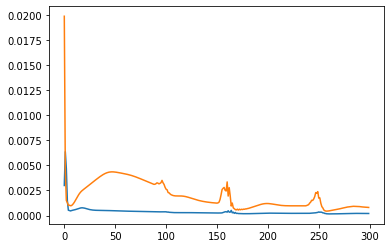

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [10]:
X_test[0]

array([[0.33818049],
       [0.35287371],
       [0.34004825],
       [0.33917661],
       [0.34515353],
       [0.35636028],
       [0.33494296]])

,Test,Predicted
0,51.080002,51.033398
1,49.799999,51.835663
2,50.000000,50.348541
3,49.619999,50.745525
4,49.509998,50.298100
...,...,...
357,102.839996,99.834534
358,103.910004,98.485390
359,103.959999,100.220757
360,103.790001,99.671776


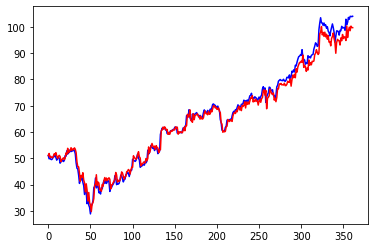

In [11]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)),color='b')
plt.plot(scl.inverse_transform(Xt),color='r')
t=[]
p=[]
for i in range(len(list(scl.inverse_transform(Xt)))):
    p.append(scl.inverse_transform(Xt)[i][0])
    t.append(scl.inverse_transform(y_test.reshape(-1,1))[i][0])
pp={'Test':t,'Predicted':p}
p1=pd.DataFrame.from_dict(pp)
p1

In [14]:
er=[]
for i in range(len(t)):
    er.append(((t[i]-p[i])/t[i])*100)
dd={'Test':t,'Predicted':p,'error':er}
test_table=pd.DataFrame(dd)
#test_table.to_excel('excel_2.xlsx')

In [ ]:
import plotly.express as px
gr={'Actual':t,'Predicted':p}
gr1=pd.DataFrame(gr)
figure2 = px.line(gr1,template='simple_white')
figure2.update_layout(xaxis_title="index",yaxis_title="Stock Price")
figure2.update_xaxes(rangeslider_visible=True)
figure2.show()

In [ ]:
act = []
pred = []
i=int(X_test.shape[0])-1
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

In [ ]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})
result_df

In [ ]:
plt.plot(scl.inverse_transform(y.reshape(-1,1)), color='k')

Xtrain = model.predict(X_train)
Xtest = model.predict(X_test)

split_pt = int(X.shape[0]*0.70) + 7
plt.plot(np.arange(7,split_pt), scl.inverse_transform(Xtrain), color='b')
plt.plot(np.arange(split_pt,split_pt+len(Xtest),1), scl.inverse_transform(Xtest), color='r')

plt.xlabel('day')
plt.ylabel('price of MMM stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
from sklearn.metrics import r2_score
r2_score(p1.Test,p1.Predicted)

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(p1.Test,p1.Predicted))
print(metrics.mean_squared_error(p1.Test,p1.Predicted))
print(np.sqrt(metrics.mean_squared_error(p1.Test,p1.Predicted)))
print(metrics.r2_score(p1.Test,p1.Predicted))